<a href="https://colab.research.google.com/github/Gustavo-Martinez-Gutierrez/Gustavo_portfolio/blob/main/3_An%C3%A1lisis_de_Datos_Aplicado_a_la_Gesti%C3%B3n_An%C3%A1lisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

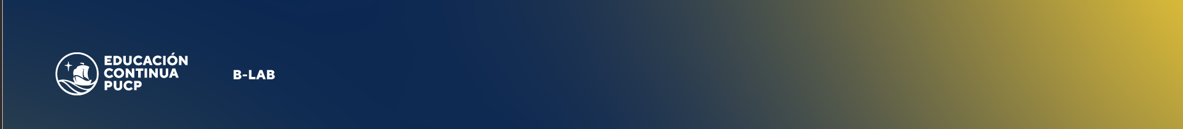


## Análisis Exploratorio de Datos

En esta sesión seguiremos trabajando con la base de datos de compra de una plataforma onlline. Como siempre, un paso previo a realizar el análisis consiste en importar las librerías necesarias. En este caso, utilizaremos únicamente pandas y numpy para el procesamiento en sí, mientras que para hacer algo de análisis visual emplearemos matplotlib y seaborn.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Al igual que en la sesión anterior, montamos el drive para que Colab pueda acceder directamente.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Abrimos el archivo con el que trabajamos en la sesión anterior:

In [ ]:
ruta = '/content/drive/MyDrive/online_platform.csv'
data_clean = pd.read_csv(ruta)

La base de datos tiene las siguientes variables:


* CustomerID: código de identificación para cada cliente
* Gender: género del cliente
* Location: ubicación del cliente
* Tenure_Months: antiguedad del cliente en la plataforma
* Transaction_ID: identificador único para cada transacción
* Transaction_Date: fecha de la transacción
* Product_SKU: Identificador Stock Keeping Unit (SKU) de cada producto
* Product_Description: Identificador del producto
* Product_Category: Categoría del producto
* Quantity: Cantidad de cada producto comprada en la transacción
* Avg_Price: Precio promedio del producto
* Delivery_Charges: Cargos asociados al envío del producto
* Coupon_Status: Estado del cupón asociado a la transacción
* GST: Impuestos asociados a la transacción
* Date: Fecha de la transacción
* Offline_Spend: Gasto del cliente en canales offline
* Online_Spend: Gasto del cliente en canales online
* Month: Mes de la transacción
* Coupon_Code: Código asociado al cupón
* Discount_pct: Porcentaje de descuento asociado a la transacción



El análisis exploratorio tiene dos principales vertientes: una de ellas consiste en calcular estadísticos, mientras que el segundo tiene que ver con el análisis visual. Si bien en la última sesión vimos algo de forma bastante rápida, ahora nos detendremos un poco más en ello.
Sin embargo, un primer paso consiste en definir qué preguntas de negocio queremos responder. Si bien se pueden formular varias, por ahora responderemos algunas:
1. ¿Cómo se comporta el gasto total por cada mes en productos en línea?
2. ¿Existe alguna relación entre el gasto total con el costo de envío?
3. ¿Cuál es el producto más vendido en cada mes?
4. ¿Dónde se encuentran los clientes que gastan más?
5. ¿El gasto total se ve afectado por el uso de cupones?

Para responder estas preguntas vamos a suponer que la base de datos ya está "limpia" y con algunas variables ya generadas. Para ello, aplicamos parte de lo visto en la sesión anterior.

In [ ]:
data_clean.drop(columns = ["Unnamed: 0", "Transaction_Date"], inplace = True)
data_clean.dropna(thresh = 5, inplace = True)

In [ ]:
data_clean['Date_new'] = pd.to_datetime(data_clean['Date']).dt.strftime("%d/%m/%Y")
data_clean['total_price'] = data_clean['Avg_Price']*(1+data_clean['GST'])

In [ ]:
data_clean['total_expense'] = data_clean['Quantity']*data_clean['total_price']
data_clean['online_offline'] = data_clean['Online_Spend'] + data_clean['Offline_Spend']
data_clean['online_pct'] = data_clean['Online_Spend']/data_clean['online_offline']

### Pregunta 1:

Para analizar el gasto total por cada mes, primero necesitamos realizar una agregación del gasto total, que en este caso viene dado por la variable total_expense, para luego tenerlo a nivel mensual. Luego haremos otro ejercicio para analizar qué pasa si el gráfico lo hacemos con datos diarios.

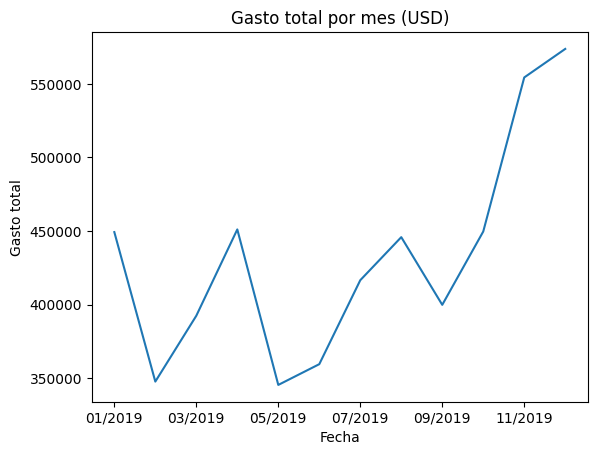

In [ ]:
data_clean['Date_month'] = pd.to_datetime(data_clean['Date']).dt.strftime("%m/%Y")

# Definimos el gráfico
ax = data_clean.groupby(by='Date_month')['total_expense'].sum().plot(
    title='Gasto total por mes (USD)',
    xlabel='Fecha',
    ylabel='Gasto total'
)

# Show the plot
plt.show()


Puede verse que el mayor mes de ventas es el de diciembre del 2019. De hecho, existe una tendencia creciente que hace que las ventas sean mayores en el cuarto trimestre de ese año.
Sin embargo, en ocasiones puede ser más apropiado mostrar toda la escala del gráfico (¿por qué?). También podemos rotar las etiquetas del eje x.

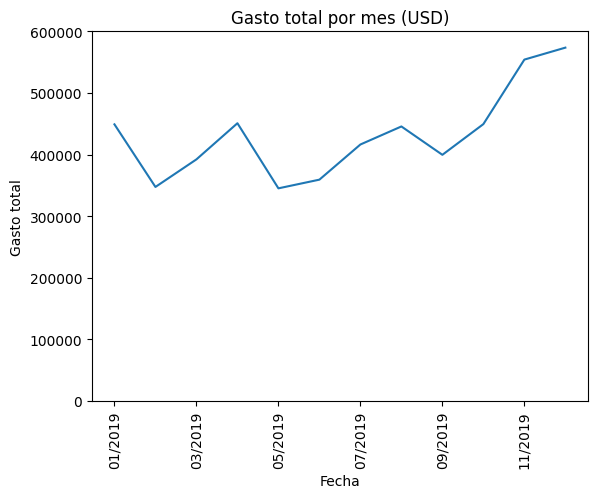

In [ ]:
# Definimos el gráfico
ax = data_clean.groupby(by='Date_month')['total_expense'].sum().plot(
    title='Gasto total por mes (USD)',
    xlabel='Fecha',
    ylabel='Gasto total'
)

# Personalizamos los ejes:
ax.set_ylim(0, 600000)  # Fijamos el eje y de 0 a 600K
plt.xticks(rotation = 90)

# Show the plot
plt.show()

El gráfico anterior es un ejemplo de un gráfico de líneas, que se utiliza para ver la evolución de una variable continua (ventas, número de clientes).

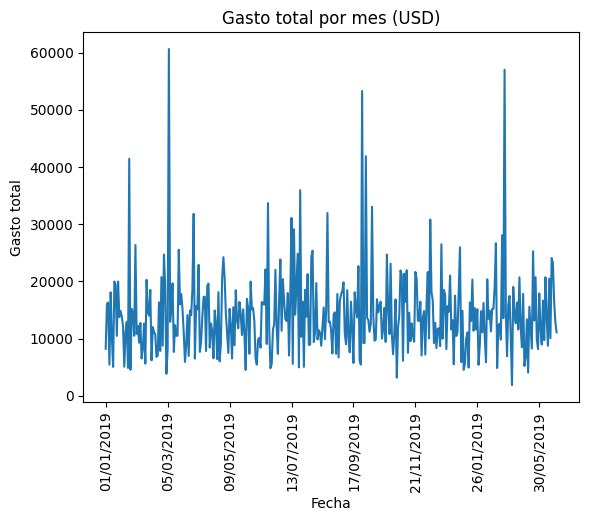

In [ ]:
# Definimos el gráfico, asignando el gráfico a la variable ax.
# - Agrupamos los datos del DataFrame data_clean por la columna Date, reuniendo las filas con la misma fecha.
# - Seleccionamos la columna total_expense del DataFrame agrupado y calcula la suma del gasto total para cada fecha.
ax = data_clean.groupby(by='Date_new')['total_expense'].sum().plot(
    title='Gasto total por mes (USD)',
    xlabel='Fecha',
    ylabel='Gasto total'
)

# Personalizamos los ejes:
# ax.set_ylim(0, 600000)  # Fijamos el eje y de 0 a 600K
plt.xticks(rotation = 90)

# Show the plot
plt.show()

### Pregunta 2:

Para responder esta pregunta vamos a incorporar el concepto de correlación. La correlación estadística es una medida que describe la relación entre dos variables. En el contexto de los negocios, entender la correlación entre diferentes variables puede ser crucial para tomar decisiones informadas. Dos tipos comunes de correlación son la correlación de Pearson y la correlación de Spearman.

**Correlación de Pearson**:
* La correlación de Pearson evalúa la relación lineal entre dos variables continuas.
* El coeficiente de correlación de Pearson (r) varía de -1 a 1. Un valor de 1 indica una correlación positiva perfecta (ambas variables aumentan juntas). Un valor de -1 indica una correlación negativa perfecta (una variable aumenta mientras la otra disminuye). Un valor cercano a 0 indica una correlación débil o inexistente.
* Es importante destacar que la correlación de Pearson asume que las variables están distribuidas de manera normal y que la relación entre ellas es lineal.

**Correlación de Spearman**:
* La correlación de Spearman evalúa la relación monotónica entre dos variables, es decir, si a medida que una variable aumenta, la otra también lo hace (o disminuye).
* Utiliza rangos en lugar de los valores reales de las variables, lo que la hace menos sensible a los valores atípicos y la hace más adecuada para trabajar con variables categóricas.
* La interpretación es similar al de la de Pearson.

Un coeficiente de correlación alto podría sugerir una fuerte relación, pero no implica necesariamente causalidad.

Es importante tener en cuenta que la correlación no implica causalidad. Aunque dos variables estén correlacionadas, no significa que una cause la otra. Es posible que haya otras variables o factores en juego que afecten ambas variables. Por lo tanto, siempre se debe interpretar la correlación con precaución y considerar otros análisis y contextos relevantes.

Vamos a calcular las correlaciones de dos formas, la primera hace uso de Numpy y la segunda de Scipy.


In [ ]:
corr = np.corrcoef(data_clean['Delivery_Charges'],data_clean['total_expense'])
print(corr)


[[1.         0.07070843]
 [0.07070843 1.        ]]


Veamos que el resultado que nos da el método es una matriz de correlaciones, pero solo nos importa el elemento fuera de la diagonal:

In [ ]:
print(corr[0,1])

0.07070842808803571


En este caso, las correlaciones utilizando la librería scipy son:


In [ ]:
import scipy.stats as stats

corr = stats.pearsonr(data_clean['Delivery_Charges'], data_clean['total_expense'])
print(corr.correlation)

corr = stats.spearmanr(data_clean['Delivery_Charges'], data_clean['total_expense'])
print(corr.correlation)

0.07070842808803575
0.1327713790113767


¿Por qué las correlaciones son distintas? ¿Qué conclusiones podemos extraer de estos resultados? ¿Qué explicación de negocio tendría este problema?

Como bonus, podemos ver una forma más gráfica de analizar las correlaciones entre más de dos variables, esto lo podemos ver con un mapa de calor:

[[ 1.          0.07070843 -0.01951208 -0.01332863]
 [ 0.07070843  1.          0.03549929  0.04048103]
 [-0.01951208  0.03549929  1.          0.33662513]
 [-0.01332863  0.04048103  0.33662513  1.        ]]


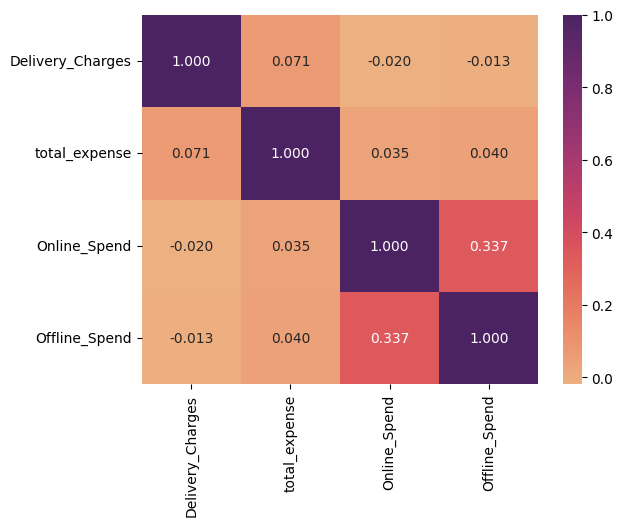

In [ ]:
variables = ['Delivery_Charges', 'total_expense', 'Online_Spend', 'Offline_Spend']
corr = np.corrcoef(data_clean[variables].T)
print(corr)

# Mapa de calor
sns.heatmap(corr, annot=True, fmt=".3f", xticklabels=variables, yticklabels=variables, cmap='flare')
plt.show()

Otro tipo de gráfico es el de nube de puntos (scatter). En este caso se puede analizar la relación entre dos o más variables. Este se puede utilizar como complemento a la correlación vista anteriormente.

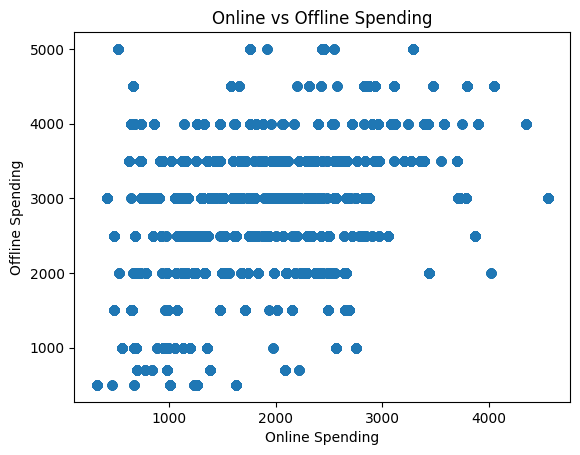

In [ ]:
# prompt: Create a scatterplot of Online_Spend and Offline_Spend

plt.scatter(data_clean['Online_Spend'], data_clean['Offline_Spend'])
plt.title('Online vs Offline Spending')
plt.xlabel('Online Spending')
plt.ylabel('Offline Spending')
plt.show()


Una vista más general se puede realizar de la siguiente forma:

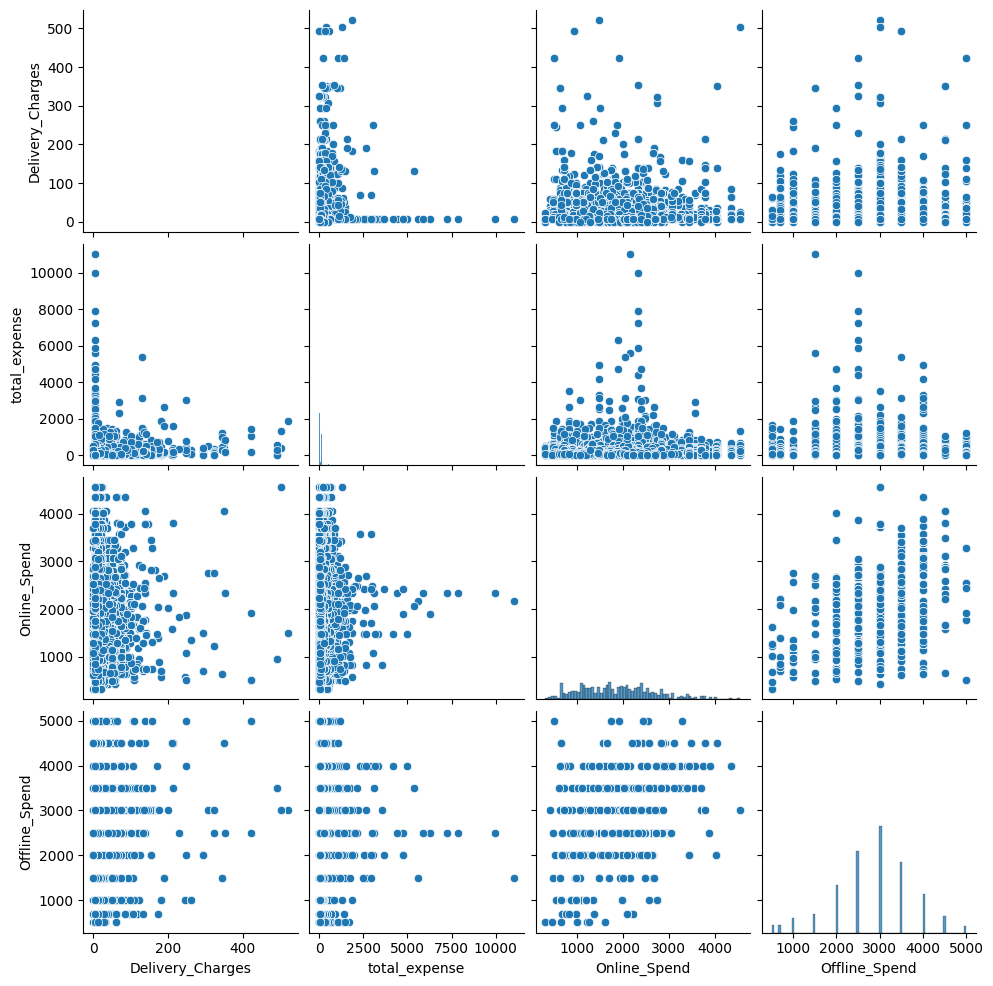

In [ ]:
sns.pairplot(data_clean[['Delivery_Charges', 'total_expense', 'Online_Spend', 'Offline_Spend']])
plt.show()


### Pregunta 3

En este caso, tenemos que identificar a aquellos productos que son los más vendidos, luego podemos saber cuál es el producto más vendido en cada mes.

In [ ]:
# Primero definimos la tabla con los productos más vendidos. Podríamos utilizarlo
# sin definir "aux", pero luego veremos que es más sencillo para graficar.
aux = data_clean.groupby(by='Product_Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Luego imprimimos el resultado.
print(aux)

Product_Description
Maze Pen                                  16234.0
Google 22 oz Water Bottle                 14282.0
Google Sunglasses                         11452.0
Sport Bag                                  7321.0
Google Metallic Notebook Set               6496.0
Google Laptop and Cell Phone Stickers      5847.0
Google Kick Ball                           5549.0
Recycled Paper Journal Set                 5381.0
Nest Cam Outdoor Security Camera - USA     5206.0
Foam Can and Bottle Cooler                 5098.0
Name: Quantity, dtype: float64


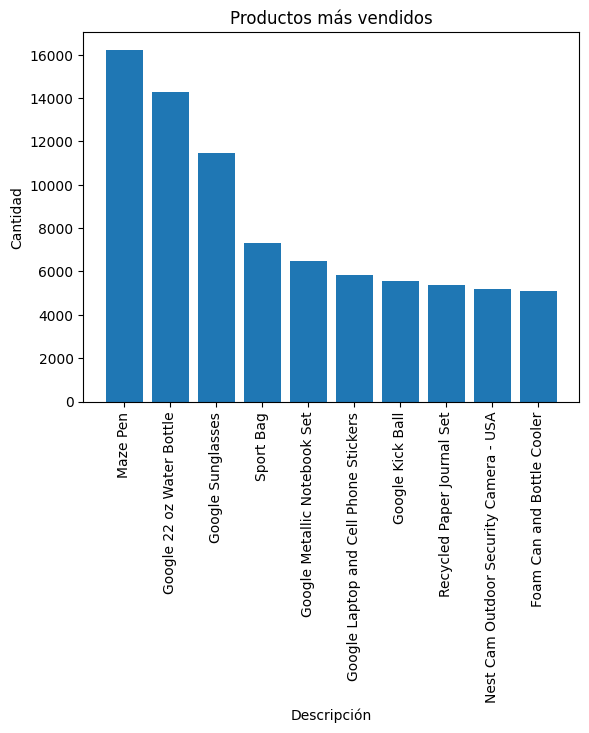

In [ ]:
plt.bar(aux.index, aux.values)

plt.xlabel('Descripción')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)
plt.title('Productos más vendidos')
plt.show()

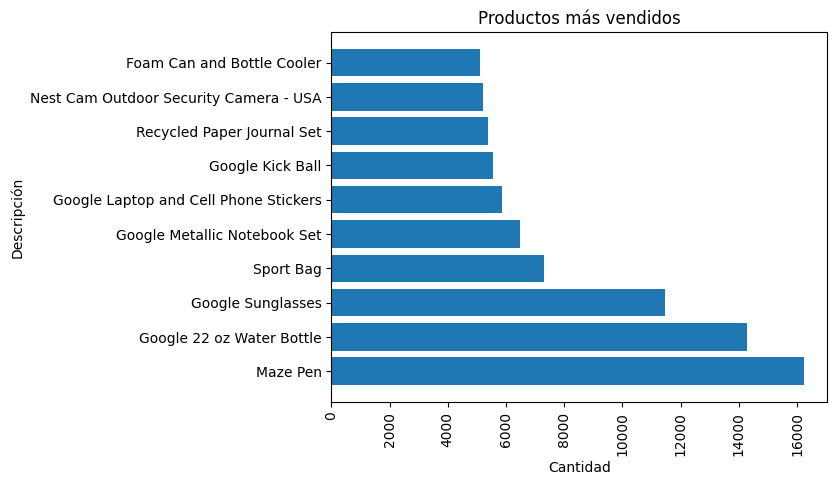

In [ ]:
plt.barh(aux.index, aux.values)

# Puede ser en orden descendente:
# plt.gca().invert_yaxis()

plt.xlabel('Cantidad')
plt.ylabel('Descripción')
plt.xticks(rotation = 90)
plt.title('Productos más vendidos')
plt.show()

También se puede expresar la misma información con un gráfico de pie. En este caso, se pueden expresar los porcentajes del total de artículos más vendidos.

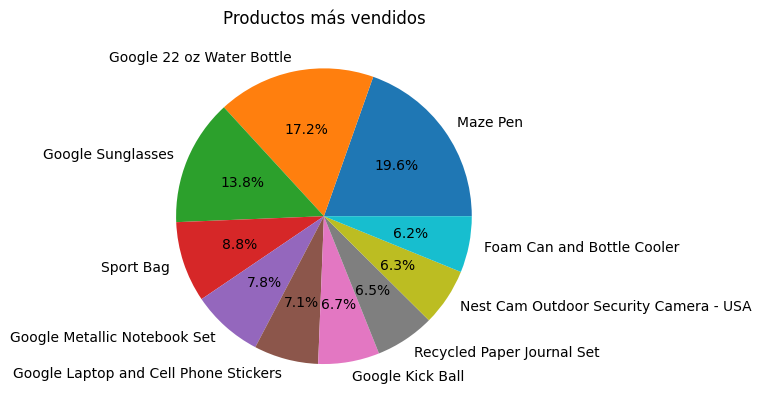

In [ ]:
plt.pie(aux.values, labels=aux.index, autopct='%1.1f%%')
plt.title('Productos más vendidos')
plt.show()

Una manera adicional consiste en hacer un gráfico de rectángulo con jerarquía.

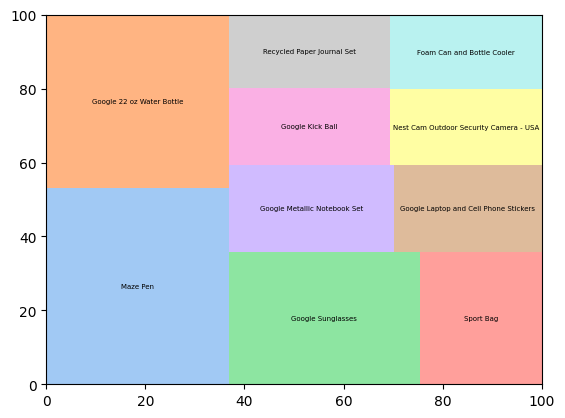

In [ ]:
!pip install squarify
import squarify

# Crea el gráfico
squarify.plot(aux.values, label=aux.index
              , text_kwargs={'fontsize': 5}
              , color=sns.color_palette('pastel'))

# Muestra el gráfico
plt.show()

Para poder identificar los productos más vendidos por cada mes:
- Agrupamos los datos del DataFrame data_clean por dos columnas: Date_month (mes de la fecha) y Product_Description (descripción del producto). Esto crea grupos de datos para cada combinación única de mes y producto.
- Seleccionamos la columna Quantity (cantidad) de los datos agrupados y calculamos la suma de las cantidades para cada grupo. Esto obtiene la cantidad total vendida de cada producto en cada mes.
- Luego, se ordenan los resultados de la suma en orden descendente según la cantidad total vendida. Esto coloca los productos con mayor cantidad vendida al principio de la lista.
- Posteriormente, agrupamos nuevamente por mes y seleccionamos el máximo.

In [ ]:
aux = data_clean.groupby(by=['Date_month', 'Product_Description'])['Quantity'].sum().sort_values(ascending=False).groupby(by='Date_month').head(1)
print(aux)

Date_month  Product_Description      
06/2019     Maze Pen                     2813.0
01/2019     Maze Pen                     2470.0
10/2019     Maze Pen                     2270.0
04/2019     Google Sunglasses            1907.0
08/2019     Maze Pen                     1858.0
07/2019     Google Sunglasses            1670.0
09/2019     Google 22 oz Water Bottle    1500.0
11/2019     Google 22 oz Water Bottle    1363.0
03/2019     Maze Pen                     1358.0
12/2019     Maze Pen                     1334.0
05/2019     Google Sunglasses            1057.0
02/2019     Maze Pen                     1009.0
Name: Quantity, dtype: float64


Ahora se elaborará un gráfico para reflejar la misma información del código anterior.

Date_month  Product_Description      
06/2019     Maze Pen                     2813.0
01/2019     Maze Pen                     2470.0
10/2019     Maze Pen                     2270.0
04/2019     Google Sunglasses            1907.0
08/2019     Maze Pen                     1858.0
07/2019     Google Sunglasses            1670.0
09/2019     Google 22 oz Water Bottle    1500.0
11/2019     Google 22 oz Water Bottle    1363.0
03/2019     Maze Pen                     1358.0
12/2019     Maze Pen                     1334.0
05/2019     Google Sunglasses            1057.0
02/2019     Maze Pen                     1009.0
Name: Quantity, dtype: float64


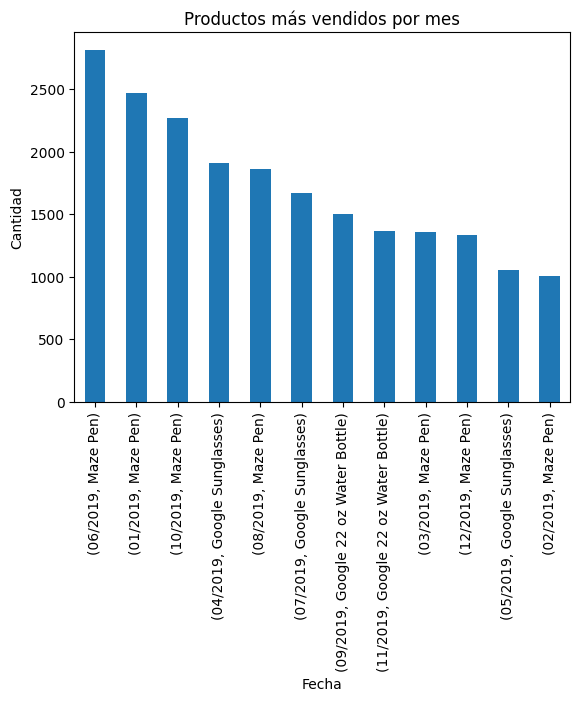

In [ ]:
aux = data_clean.groupby(by=['Date_month', 'Product_Description'])['Quantity'].sum().sort_values(ascending=False).groupby(by='Date_month').head(1)
print(aux)
aux.plot(kind='bar')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)
plt.title('Productos más vendidos por mes')
plt.show()


### Pregunta 4

Para responder esta pregunta, primero veremos la evolución de las ventas por locación. ¿Qué conclusiones podemos extraer? ¿Qué diferenicas hay entre los datos agregados que mostramos previamente?

Para elaborar el gráfico:
- Agrupamos los datos del DataFrame data_clean por dos columnas: Date_month y Location. Esto crea grupos de datos para cada combinación de mes y localización.
- Seleccionamos la columna total_expense de los datos agrupados y calculamos la suma del gasto total para cada grupo, obteniendo el gasto total por mes y localización.
- .unstack(): Reorganiza el DataFrame agrupado, convirtiendo las columnas de localización en filas. Esto crea una matriz donde cada fila representa una localización y cada columna representa un mes, con los gastos totales correspondientes en las celdas.

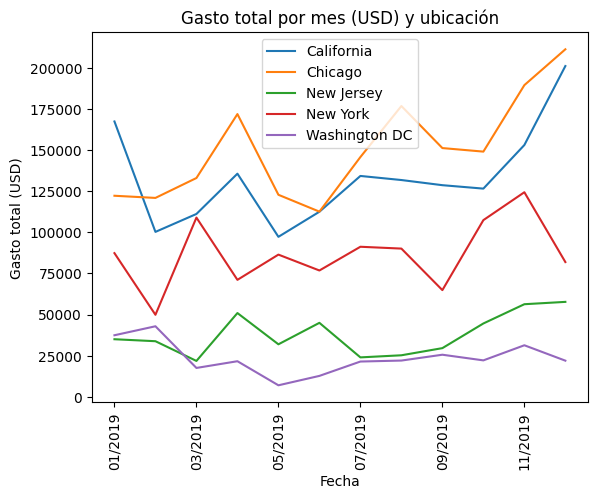

In [ ]:
data_clean.groupby(by=['Date_month', 'Location'])['total_expense'].sum().unstack().plot(kind='line')

plt.xlabel('Fecha')
plt.ylabel('Gasto total (USD)')
plt.xticks(rotation = 90)
plt.legend(loc='best')
plt.title('Gasto total por mes (USD) y ubicación')
plt.show()

Puede verse que la tendencia anterior no siempre es la misma para todas las locaciones. En algunos casos hay una tendencia creciente (California, Chicago), mientras que en el resto es relativamente estable.

Por último, veremos cuál es el producto más vendido por locación.

Location       Product_Description      
Chicago        Google 22 oz Water Bottle    6287.0
California     Maze Pen                     4799.0
New York       Maze Pen                     3795.0
New Jersey     Maze Pen                     2520.0
Washington DC  Maze Pen                     1109.0
Name: Quantity, dtype: float64


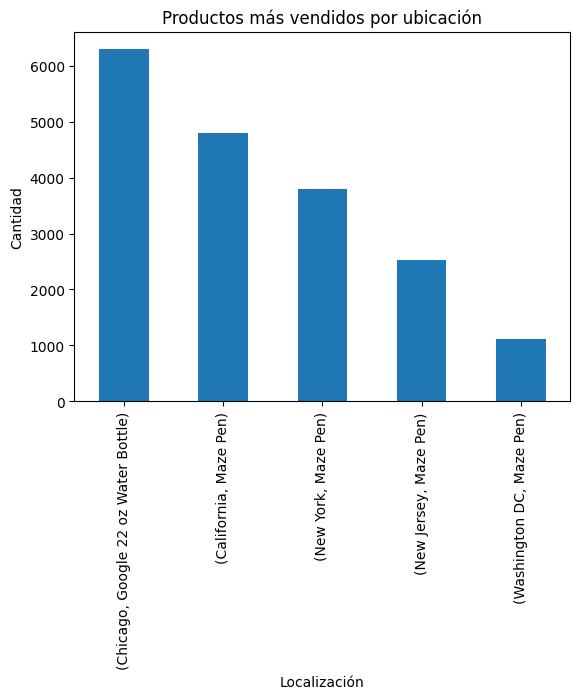

In [ ]:
aux = data_clean.groupby(by=['Location', 'Product_Description'])['Quantity'].sum().sort_values(ascending=False).groupby(by='Location').head(1)
print(aux)

aux.plot(kind='bar')
plt.xlabel('Localización')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)
plt.title('Productos más vendidos por ubicación')
plt.show()


### Pregunta 5

In [ ]:
print(data_clean['Coupon_Status'])

0            Used
1            Used
2        Not Used
3         Clicked
4         Clicked
           ...   
52919     Clicked
52920        Used
52921     Clicked
52922        Used
52923    Not Used
Name: Coupon_Status, Length: 52924, dtype: object


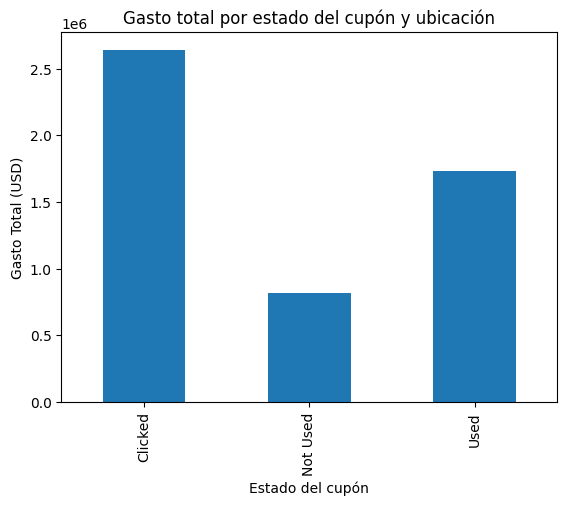

In [ ]:
data_clean.groupby(by='Coupon_Status')['total_expense'].sum().plot(kind='bar')
plt.xlabel('Estado del cupón')
plt.ylabel('Gasto Total (USD)')
plt.title('Gasto total por estado del cupón y ubicación')
plt.show()


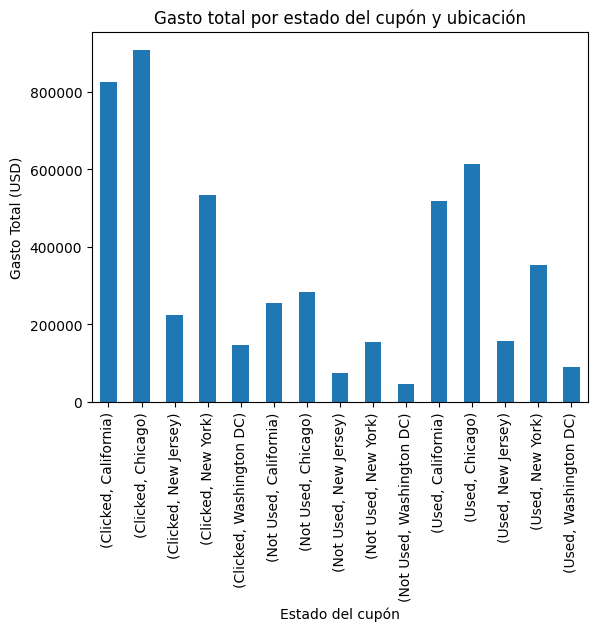

In [ ]:
data_clean.groupby(by=['Coupon_Status', 'Location'])['total_expense'].sum().plot(kind='bar')
plt.xlabel('Estado del cupón')
plt.ylabel('Gasto Total (USD)')
plt.title('Gasto total por estado del cupón y ubicación')
plt.show()

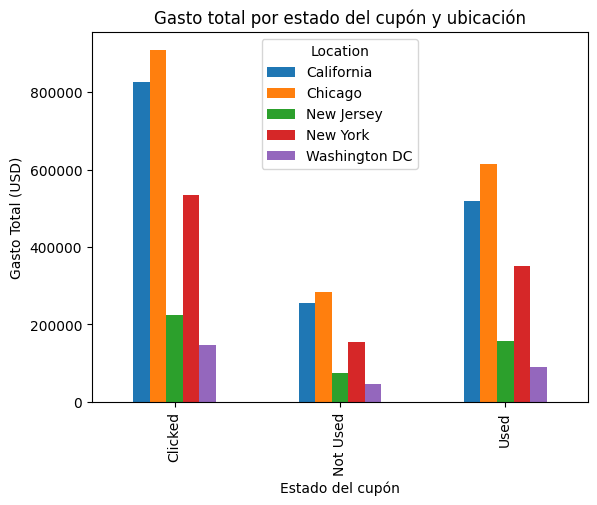

In [ ]:
data_clean.groupby(by=['Coupon_Status', 'Location'])['total_expense'].sum().unstack().plot(kind='bar')
plt.xlabel('Estado del cupón')
plt.ylabel('Gasto Total (USD)')
plt.title('Gasto total por estado del cupón y ubicación')
plt.show()

In [ ]:
ruta = '/content/drive/MyDrive/data_clean.csv'
data_clean.to_csv(ruta, index=False)